In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False

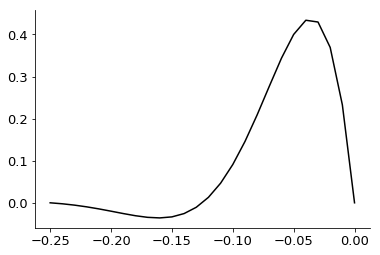

In [220]:
# Generate an example filter
dt = 0.01
freq = 4
tau = 0.05
t = np.arange(-0.25, 0+dt, dt)
f = -np.sin(2*np.pi*freq*t)*np.exp(t/tau)
f = f / np.linalg.norm(f)
plt.plot(t, f, 'k-')

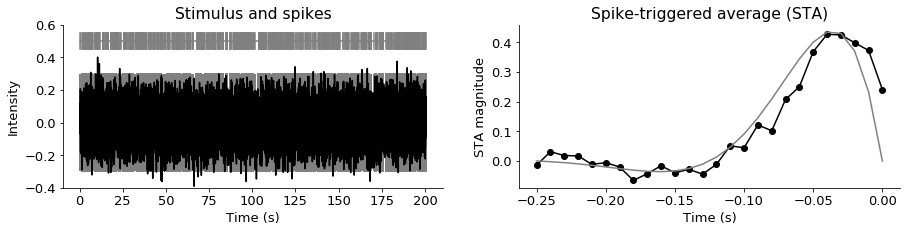

In [248]:
l = 1000; # stimulus length in seconds
nPlot = 20000; # samples to plot
winSize = 0.25
shift = 50
time = np.arange(0, l/dt+dt, dt)
s = 0.1*np.random.randn(int(l/dt));
z = np.convolve(s, np.flip(f, axis=0), 'full')
mu = z * (z>0)
spikes = np.random.poisson(mu)

plt.figure(figsize=(15, 3))
ah = plt.subplot(1, 2, 1)
plt.plot(time[shift:nPlot+shift], s[shift:nPlot+shift], 'k-')
ah.set_ylabel('Intensity')
ah.set_xlabel('Time (s)')
ah.set_title('Stimulus and spikes')
ah.set_ylim([-0.4, 0.6])
plt.plot(time[shift:nPlot+shift], 0.5*np.ones(nPlot), '-', color='gray')
for idx in np.argwhere(spikes[shift:nPlot+shift]>0):
    plt.plot([time[idx+shift], time[idx+shift]], [0.45, 0.55], '-', color='gray')
    rect = patches.Rectangle([time[idx+shift]-winSize, -0.3], winSize, 0.6, linewidth=2,edgecolor='gray',facecolor='none')
    ah.add_patch(rect)
    
ah = plt.subplot(1, 2, 2)
nSta = int(winSize/dt)+1;
sta = np.zeros(nSta)
for idx in np.argwhere(spikes[shift:nPlot+shift]>0):
    sta += s[idx[0]+shift-nSta:idx[0]+shift]
staNorm = sta / np.linalg.norm(sta)
plt.plot(np.arange(-winSize, 0+dt, dt), staNorm, 'ko-')
plt.plot(t, f, '-', color='gray')
ah.set_ylabel('STA magnitude')
ah.set_xlabel('Time (s)')
ah.set_title('Spike-triggered average (STA)');